In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()


In [3]:
dir(cancer)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA

In [9]:
## see here, the data is not properly normalized
##  so lets normalize the data 

## standard scaler will convert the proper column into normalized distribution
## with mean zero and standard deviation as 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

scaled_df = scaler.transform(df)

scaled_df


array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [20]:
## since there are 30 cols in the df data
## lets convert the 30 cols in 2 dimension that is 2D

from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
pca.fit(scaled_df)


PCA(n_components=0.99)

In [21]:
x_pca = pca.transform(scaled_df)

In [22]:
## lets see the transformation

x_pca.shape, scaled_df.shape

## see the shape, the 30 cols got reduced to 2 cols

((569, 17), (569, 30))

In [23]:
x_pca

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -6.01793127e-01,  7.45115792e-01, -2.65470777e-01],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         8.97486713e-03, -6.48808694e-01, -1.72122035e-02],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.83419744e-01,  3.25110527e-01,  1.90918481e-01],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
         9.09977705e-02, -2.32648464e-01, -6.56148595e-02],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
         2.29591034e-01, -6.10468376e-02, -1.68514135e-01],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
         2.17343343e-01,  9.21287617e-01, -3.04810427e-01]])

## we just reduced the data from 30D to 2D

In [24]:
x_pca

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -6.01793127e-01,  7.45115792e-01, -2.65470777e-01],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         8.97486713e-03, -6.48808694e-01, -1.72122035e-02],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.83419744e-01,  3.25110527e-01,  1.90918481e-01],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
         9.09977705e-02, -2.32648464e-01, -6.56148595e-02],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
         2.29591034e-01, -6.10468376e-02, -1.68514135e-01],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
         2.17343343e-01,  9.21287617e-01, -3.04810427e-01]])

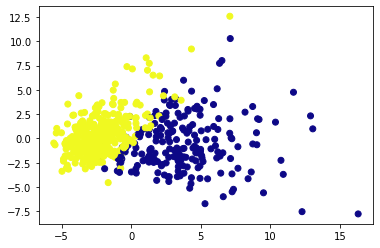

In [25]:
## since cancer is targetted as 0 or 1
## so only 2 colors 
## so use c as cancer['target'] to see the diff colors in the scatter plot
plt.scatter(x_pca[:,0],x_pca[:,1],c = cancer['target'],cmap='plasma')

In [26]:
## now since it got reduced to so less dimensions
## now we can use the xgboost, decision tree, k means and all
## Now the accuracy will be very good

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [27]:
print(len(pca.components_))

pca.components_
## it has the combination of all the 30 cols
## the components are having the weights assigned to the cols so that they can be reduced to given specified dimensions


17


array([[ 2.18902444e-01,  1.03724578e-01,  2.27537293e-01,
         2.20994985e-01,  1.42589694e-01,  2.39285354e-01,
         2.58400481e-01,  2.60853758e-01,  1.38166959e-01,
         6.43633464e-02,  2.05978776e-01,  1.74280281e-02,
         2.11325916e-01,  2.02869635e-01,  1.45314521e-02,
         1.70393451e-01,  1.53589790e-01,  1.83417397e-01,
         4.24984216e-02,  1.02568322e-01,  2.27996634e-01,
         1.04469325e-01,  2.36639681e-01,  2.24870533e-01,
         1.27952561e-01,  2.10095880e-01,  2.28767533e-01,
         2.50885971e-01,  1.22904556e-01,  1.31783943e-01],
       [-2.33857132e-01, -5.97060883e-02, -2.15181361e-01,
        -2.31076711e-01,  1.86113023e-01,  1.51891610e-01,
         6.01653628e-02, -3.47675005e-02,  1.90348770e-01,
         3.66575471e-01, -1.05552152e-01,  8.99796818e-02,
        -8.94572342e-02, -1.52292628e-01,  2.04430453e-01,
         2.32715896e-01,  1.97207283e-01,  1.30321560e-01,
         1.83848000e-01,  2.80092027e-01, -2.19866379e-

In [28]:
pd.set_option('display.max_columns', None)
df['target'] = cancer['target']
df.corr().tail(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
target,-0.730029,-0.415185,-0.742636,-0.708984,-0.35856,-0.596534,-0.69636,-0.776614,-0.330499,0.012838,-0.567134,0.008303,-0.556141,-0.548236,0.067016,-0.292999,-0.25373,-0.408042,0.006522,-0.077972,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.65961,-0.793566,-0.416294,-0.323872,1.0


In [29]:
df.corr().tail(1).values

array([[-0.73002851, -0.4151853 , -0.74263553, -0.70898384, -0.35855997,
        -0.59653368, -0.69635971, -0.77661384, -0.33049855,  0.0128376 ,
        -0.56713382,  0.00830333, -0.5561407 , -0.54823594,  0.06701601,
        -0.29299924, -0.25372977, -0.40804233,  0.00652176, -0.07797242,
        -0.77645378, -0.45690282, -0.78291414, -0.73382503, -0.42146486,
        -0.59099824, -0.65961021, -0.79356602, -0.41629431, -0.32387219,
         1.        ]])

In [30]:
## lets see the corr values except for the target variable
 corr_values = [-0.73002851, -0.4151853 , -0.74263553, -0.70898384, -0.35855997,
        -0.59653368, -0.69635971, -0.77661384, -0.33049855,  0.0128376 ,
        -0.56713382,  0.00830333, -0.5561407 , -0.54823594,  0.06701601,
        -0.29299924, -0.25372977, -0.40804233,  0.00652176, -0.07797242,
        -0.77645378, -0.45690282, -0.78291414, -0.73382503, -0.42146486,
        -0.59099824, -0.65961021, -0.79356602, -0.41629431, -0.32387219]

In [31]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [32]:
k=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

ans = pd.DataFrame()
ans.insert(0,'variables',k)
ans.insert(1,'pca_component_score_1',pca.components_[0])
ans.insert(2,'pca_component_score_2',pca.components_[1])
ans.insert(3,'corr_values',corr_values)

ans.set_index('variables')

ans.sort_values(by='corr_values',ascending=False)


,variables,pca_component_score_1,pca_component_score_2,corr_values
14,smoothness error,0.014531,0.204430,0.067016
9,mean fractal dimension,0.064363,0.366575,0.012838
11,texture error,0.017428,0.089980,0.008303
18,symmetry error,0.042498,0.183848,0.006522
19,fractal dimension error,0.102568,0.280092,-0.077972
16,concavity error,0.153590,0.197207,-0.253730
15,compactness error,0.170393,0.232716,-0.292999
29,worst fractal dimension,0.131784,0.275339,-0.323872
8,mean symmetry,0.138167,0.190349,-0.330499
4,mean smoothness,0.142590,0.186113,-0.358560


In [33]:
len(df.corr())

31

In [34]:
pd.DataFrame(x_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262955,-0.859014,0.103388,-0.690804,-0.601793,0.745116,-0.265471
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,0.157923,-0.943529,-0.653475,0.008975,-0.648809,-0.017212
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605604,0.124387,-0.410627,0.016680,0.483420,0.325111,0.190918
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151514,1.011316,-0.933271,-0.487417,-0.168848,0.051370,0.482634
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651360,-0.110515,0.387948,-0.539181,0.310319,-0.152606,0.133142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,-0.062651,0.123342,-0.051723,-0.404290,0.652750,0.147642,0.348266
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0.244804,0.222753,-0.192637,0.015555,-0.069975,-0.138184,0.293495
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,-0.840512,0.096473,0.157418,0.285691,0.090998,-0.232648,-0.065615
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,-0.178628,-0.697461,1.225195,0.218698,0.229591,-0.061047,-0.168514


<AxesSubplot:>

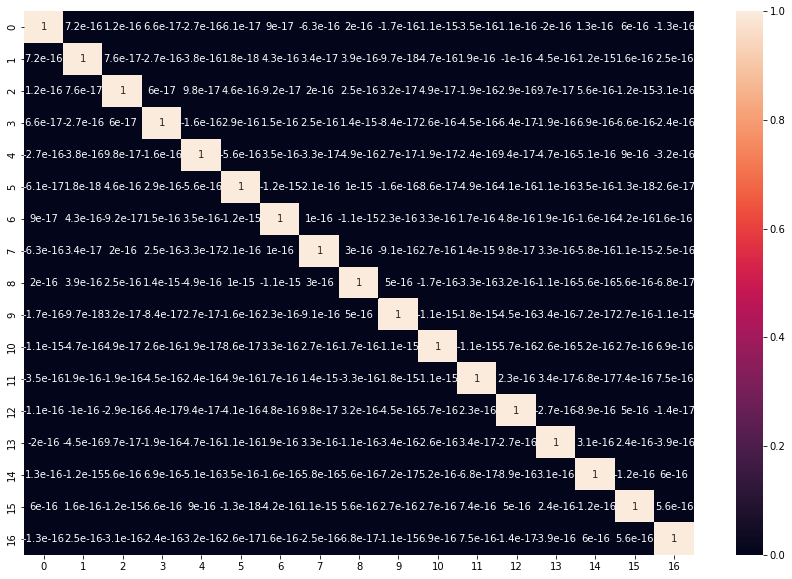

In [39]:
plt.figure(figsize=(15,10))
k = pd.DataFrame(x_pca).corr()
sns.heatmap(k,annot=True)